In [56]:
# !pip install pandas matplotlib seaborn plotly.express

In [57]:
#pip install nbformat

In [58]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv(r'C:\Users\sruth\Documents\Greenbootcamps\DS_EDA_assignment\data\kc_house_data.csv')


#View the data
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
#Hypothesis for the overall data
#1.When the total square_ft increases ,prices increasing
#2..When the total number of bedrooms increases ,prices increasing
#3.Old houses still have demand,Price is not depend on the year they built


## Stakeholder Info

In [60]:
#Stakeholder - have the conditions below
#Larry Sanders - Buyer
    #Waterfront 
    #limited budget
    #nice & isolated but central neighborhood without kids (but got some of his own, just doesn't his kids to play with other kids .. because of germs)

#The person is looking for a nice and quiet (isolated) neighborhood...

# But it should also be central (i.e., close to the city).

# They don’t want other children in the area...

# Even though they have kids themselves!

# The reason? They don’t want their kids interacting with other kids — because of fear of germs.

## Hypothesis created

In [61]:
#hypothesis based on the Stakeholder - Larry Sanders - Buyer

#1. If the neighborhoods have kids,then they have large total area of the land(sqft_lot15 - including the building, yard, driveway, garden, and any other outdoor space.)

#2. If the house has Waterfront,then the price will be high

#3. If the house is isolated or don't have any neighborhood ,then the house is most likely in outskirts.



## EDA

In [62]:
df.shape   #from here we get the number of rows and columns

(21613, 21)

In [63]:
df.columns.unique()  #from here we get an idea of columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [64]:
df.info()  #from here we can say there is no columns containing null values,but date is in the format of object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
df['date'] = pd.to_datetime(df['date'])

In [66]:
print(df.date.dtype)   #datatype of date changed to datetime

datetime64[ns]


In [67]:
#Find the duplicates
df.duplicated().any()  #there is no duplicate data in the dataframe

np.False_

In [68]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [69]:
#unique values
print(df['grade'].unique())
print(df['bedrooms'].unique())
print(df['floors'].unique())


[ 7  6  8 11  9  5 10 12  4  3 13  1]
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
[1.  2.  1.5 3.  2.5 3.5]


## Visualize the Unique counts

<Axes: xlabel='grade', ylabel='count'>

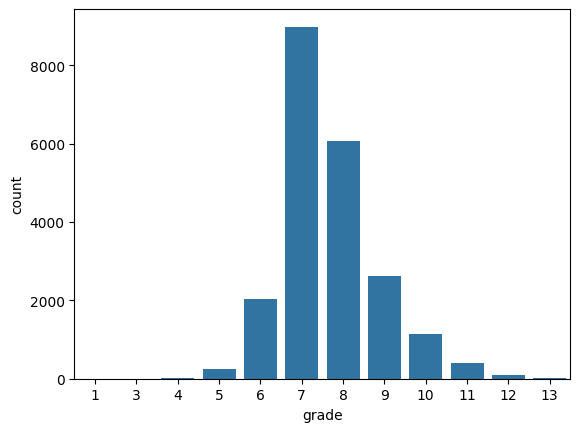

In [70]:
#Plot the unique values
sns.countplot(x=df["grade"])

<Axes: xlabel='floors', ylabel='count'>

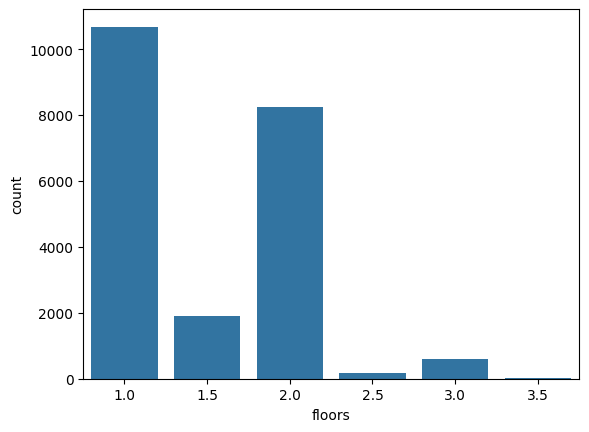

In [71]:
#Plot the unique values
sns.countplot(x=df["floors"]) 

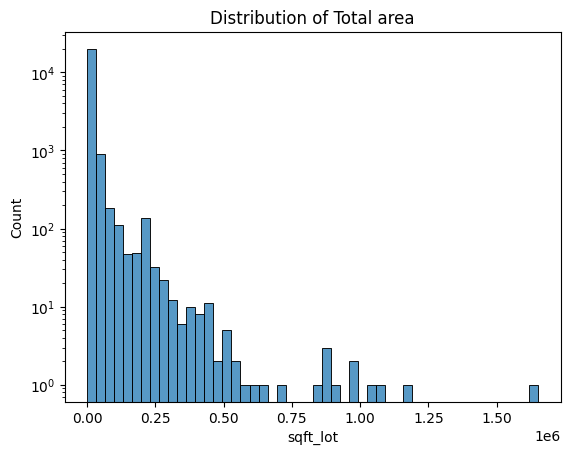

In [72]:
sns.histplot(df['sqft_lot'], bins=50)
plt.title('Distribution of Total area')
plt.yscale("log")
plt.show()

# Most houses have small lot sizes (the tall bars on the left).

# A few houses have very large lot sizes (the bars stretched out on the right).

In [73]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
#1. If the neighborhoods  have kids,then they have large total area of the land(sqft_lot15 - including the building, yard, driveway, garden, and any other outdoor space.)


df_bedrooms = df[df['bedrooms'] >= 2].reset_index()  #If the bedrooms >=2 ,mostly they have kids,lets see how it related with Total space
df_bedrooms['bedrooms'] = df_bedrooms['bedrooms'].astype(str)

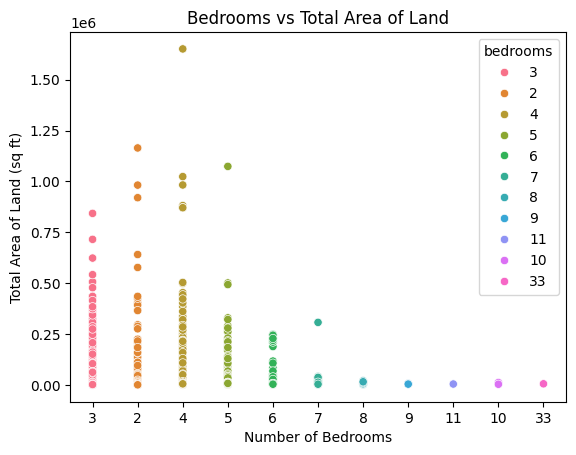

In [75]:
sns.scatterplot(data = df_bedrooms,x='bedrooms',y='sqft_lot',hue='bedrooms')
plt.title('Bedrooms vs Total Area of Land')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total Area of Land (sq ft)')
plt.show()

In [76]:
#Smaller bedroom counts (2 to 4) show a wide range of lot sizes, including some very large lots.
# Higher bedroom counts (above 6) mostly cluster around smaller lot sizes.

# However, total lot area is not strictly increasing with bedroom count — for higher bedroom counts, the lot sizes actually tend to be smaller or moderate.

#The data shows no strong evidence that houses with more kids (two or more bedrooms) require larger land areas, indicating lot size is not dependent on family size in this dataset.so hypothesis is wrong

[0 1]


<Axes: xlabel='waterfront', ylabel='price'>

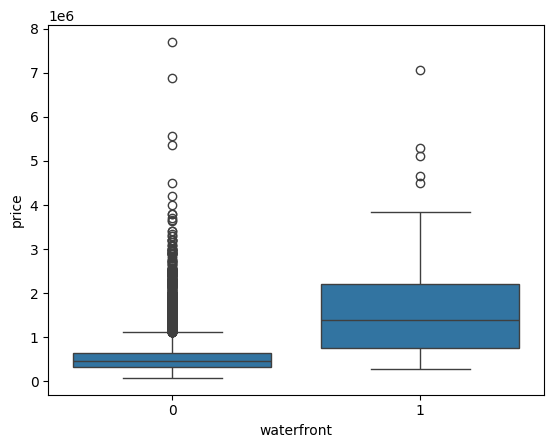

In [77]:
#2. If the house has Waterfront,then the price will be high

print(df.waterfront.unique())

sns.boxplot(data=df, x='waterfront', y='price')

#Left box (0 = Non-Waterfront homes):

# Most homes fall in a lower price range, centered under 1 million.

# Many outliers (dots above the box) — meaning some non-waterfront homes are still expensive.

# Right box (1 = Waterfront homes):

# Prices are centered significantly higher — median looks around $1.5–2M.

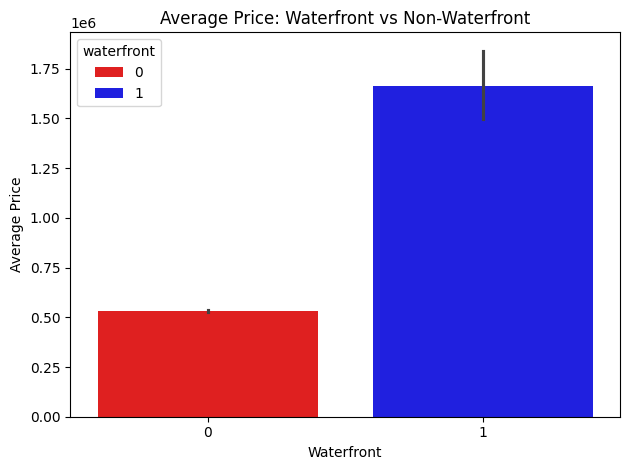

In [78]:
sns.barplot(data = df,x='waterfront',y='price',palette=['red', 'blue'] ,hue='waterfront')
plt.title('Average Price: Waterfront vs Non-Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [79]:
#Hence hypothesis 3 is prooved!!

In [80]:
#3. If the house is isolated or don't have any neighborhood ,then the house is most likely in outskirts.

In [81]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df1 = df.groupby('zipcode')['sqft_lot15'].mean().sort_values(ascending=True).reset_index()   #→ Larger average lots → More space between houses → More isolated(they have more land area and the space between the houses are high)
df1.head()

,zipcode,sqft_lot15
0,98102,3310.133333
1,98107,3438.857143
2,98103,3472.323920
3,98122,3561.982759
4,98109,3605.724771


In [83]:
print("Max",df1.sqft_lot15.max())
print("Min",df1.sqft_lot15.min())
print("Mean",df1.sqft_lot15.mean())

Max 81290.86440677966
Min 3310.133333333333
Mean 15371.813522447872


In [84]:
# Calculate the median or use a threshold
threshold = df1['sqft_lot15'].median()
print(threshold)

# Which homes are in denser neighborhoods (smaller lots)

# Which homes are in more isolated neighborhoods (larger lots)

# Classify as 'More Neighbors' or 'Less Neighbors'
df1['neighborhood_type'] = df1['sqft_lot15'].apply(lambda x: 'Less Neighbors' if x > threshold else 'More Neighbors')
df1.head(2)


9657.652759419549


,zipcode,sqft_lot15,neighborhood_type
0,98102,3310.133333,More Neighbors
1,98107,3438.857143,More Neighbors


In [85]:
df1[df1['neighborhood_type'] == 'Less Neighbors'].head(5)

,zipcode,sqft_lot15,neighborhood_type
35,98023,9735.404810,Less Neighbors
36,98168,9744.022305,Less Neighbors
37,98003,9746.178571,Less Neighbors
38,98188,9752.801471,Less Neighbors
39,98155,9812.881166,Less Neighbors


In [86]:
df1[df1['neighborhood_type'] == 'More Neighbors'].head(5)

,zipcode,sqft_lot15,neighborhood_type
0,98102,3310.133333,More Neighbors
1,98107,3438.857143,More Neighbors
2,98103,3472.323920,More Neighbors
3,98122,3561.982759,More Neighbors
4,98109,3605.724771,More Neighbors


In [87]:
# Merge back to main df
df = df.merge(df1[['zipcode', 'neighborhood_type']], on='zipcode', how='left')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,More Neighbors
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,More Neighbors
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Less Neighbors
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,More Neighbors
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Less Neighbors


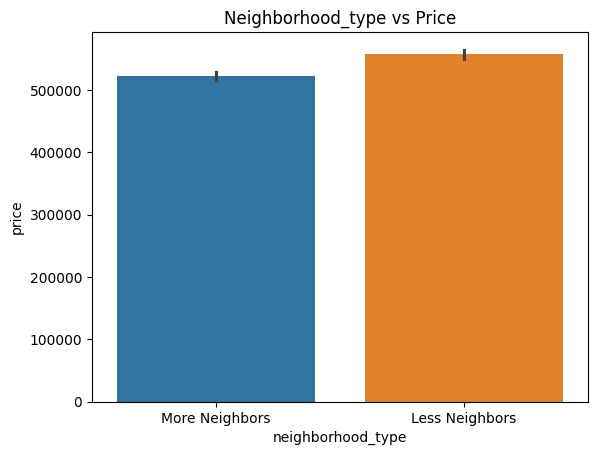

In [88]:
sns.barplot(data = df,x='neighborhood_type',y='price',hue='neighborhood_type')
plt.title('Neighborhood_type vs Price')
plt.show()

# The orange bar (Less Neighbors) shows houses in more isolated areas (larger average lot size).

# The blue bar (More Neighbors) represents houses in more crowded areas (smaller average lot size).

# From the plot, houses in Less Neighbors areas tend to have a slightly higher average price than those in More Neighbors areas.

In [89]:
import plotly.express as px

fig = px.scatter_map(
    df,
    lat="lat",
    lon="long",
    color="neighborhood_type",  # Color by neighborhood type
    hover_name="id",            # Show house ID on hover
    hover_data=["price", "zipcode", "sqft_lot15",'waterfront'],
    zoom=9,
    height=600,
    # mapbox_style="carto-positron"  # Clean map style
)

fig.update_layout(title="Neighborhood Types by Location")
fig.show()

In [90]:
#This matches the hypothesis about isolation and neighborhood density.
#If the house is isolated or don't have any neighborhood ,then the house is most likely in outskirts.

## Recommendation - filtered data for Larry Sanders(stakeholder)

In [94]:
# But Larry Sanders needs Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't his kids to play with other kids .. because of germs)
df_wtrfrnt_lowprice = df[(df['waterfront'] == 1) & (df['neighborhood_type'] == 'Less Neighbors') & (df['yr_built'] > 2000)]
df_wtrfrnt_lowprice
low_price_zipcodes = df_wtrfrnt_lowprice.groupby('zipcode')['price'].mean().reset_index().sort_values('price',ascending=True)
filtered_df = df_wtrfrnt_lowprice[df_wtrfrnt_lowprice['zipcode'].isin(low_price_zipcodes['zipcode'])]
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood_type
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508,Less Neighbors
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,Less Neighbors
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,3000,0,2001,0,98075,47.5884,-122.086,3000,15959,Less Neighbors
4486,1724069059,2014-05-24,2000000.0,5,4.00,4580,4443,3.0,1,4,...,4580,0,2004,0,98075,47.5682,-122.059,2710,4443,Less Neighbors
6233,2024069008,2014-06-19,2200000.0,5,4.75,5990,10450,2.0,1,4,...,4050,1940,2002,0,98027,47.5554,-122.077,3330,14810,Less Neighbors
7989,9362000040,2014-06-23,3400000.0,3,4.50,5230,17826,2.0,1,4,...,3740,1490,2005,0,98040,47.5348,-122.243,3670,17826,Less Neighbors
8978,1724069060,2015-05-07,1075000.0,2,3.25,1550,1767,3.0,1,3,...,1550,0,2006,0,98075,47.5684,-122.060,2710,3444,Less Neighbors
15377,1568100920,2015-04-08,1950000.0,4,2.50,3440,14554,2.0,1,4,...,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810,Less Neighbors
19971,2623039019,2014-05-08,988500.0,3,2.75,2015,16807,2.0,1,4,...,2015,0,2007,0,98166,47.4500,-122.377,1780,12310,Less Neighbors
19984,2025069140,2015-03-17,1898000.0,3,2.50,2830,4334,3.0,1,4,...,2830,0,2006,0,98074,47.6318,-122.071,2830,38211,Less Neighbors


In [95]:

fig = px.scatter_map(
    filtered_df,
    lat="lat",
    lon="long",
    color="zipcode",  # Color by neighborhood type
    hover_name="id",            # Show house ID on hover
    hover_data=["price", "zipcode", "sqft_lot15",'waterfront'],
    zoom=9,
    height=600,
    # mapbox_style="carto-positron"  # Clean map style
)

fig.update_layout(title="Waterfront , limited budget, nice & isolated")
fig.show()